# Hoja de trabajo 2 
### Mineria de datos

1: Visualicen los datos

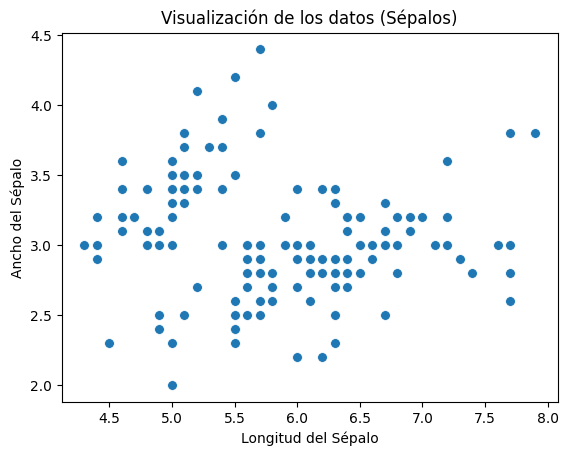

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
iris = pd.read_csv('iris.csv')

# Visualización inicial
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', s=50)
plt.title('Visualización de los datos (Sépalos)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.show()


La gráfica muestra la distribución de los datos en el plano cartesiano, utilizando la longitud del sépalo en el eje x y el ancho del sépalo en el eje y. Observamos que los puntos están dispersos en varias regiones, con una mayor concentración en la parte central del gráfico. Este comportamiento sugiere que hay cierta estructura en los datos que podría representar grupos naturales, pero no es completamente evidente debido a la superposición entre las regiones.

La forma de esta gráfica es así porque los valores de longitud y ancho del sépalo presentan variaciones consistentes dentro del rango de las muestras de Iris. Sin embargo, estos dos atributos por sí solos no son lo suficientemente diferenciadores para separar claramente las especies, lo que se refleja en la distribución sin separaciones marcadas. Esto motiva el uso de técnicas como el clustering para explorar patrones ocultos en los datos.

2. Aplicar K-Means con 2 clusters
Crear 2 clusters y graficar los resultados

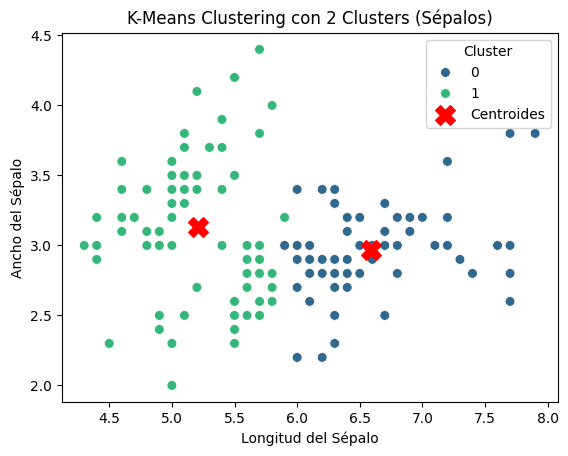

In [3]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
iris['Cluster'] = kmeans.fit_predict(iris[['sepal_length', 'sepal_width']])
centroids = kmeans.cluster_centers_

# Graficar los clusters
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='Cluster', palette='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')  # Centroides
plt.title('K-Means Clustering con 2 Clusters (Sépalos)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.legend(title='Cluster')
plt.show()



La gráfica muestra cómo el algoritmo K-Means dividió los datos en dos clusters utilizando las variables de longitud y ancho del sépalo. Los puntos azules (Cluster 0) y verdes (Cluster 1) están separados principalmente en función de la combinación de ambas variables. Los centroides, marcados con "X" rojas, representan los puntos centrales calculados para cada cluster. Esta segmentación refleja la estructura general de los datos, donde las dos agrupaciones principales capturan las regiones más densas del gráfico. Sin embargo, hay cierta superposición entre los clusters, lo que sugiere que estas dos características no son completamente distintivas para separar grupos de manera perfecta.

3: Estandarizar los datos y repetir el paso 2

In [4]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
iris[['sepal_length_std', 'sepal_width_std']] = scaler.fit_transform(iris[['sepal_length', 'sepal_width']])


In [5]:
# Aplicar K-Means con datos estandarizados (k=2)
kmeans_std = KMeans(n_clusters=2, random_state=42)
iris['Cluster_std'] = kmeans_std.fit_predict(iris[['sepal_length_std', 'sepal_width_std']])
centroids_std = kmeans_std.cluster_centers_

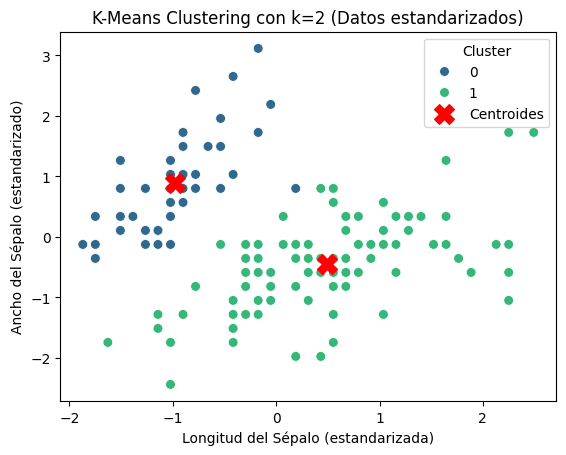

In [6]:
# Graficar los clusters con datos estandarizados
sns.scatterplot(data=iris, x='sepal_length_std', y='sepal_width_std', hue='Cluster_std', palette='viridis', s=50)
plt.scatter(centroids_std[:, 0], centroids_std[:, 1], c='red', marker='X', s=200, label='Centroides')  # Centroides
plt.title('K-Means Clustering con k=2 (Datos estandarizados)')
plt.xlabel('Longitud del Sépalo (estandarizada)')
plt.ylabel('Ancho del Sépalo (estandarizado)')
plt.legend(title='Cluster')
plt.show()

En esta gráfica, los datos han sido estandarizados, lo que significa que las variables `sepal_length` y `sepal_width` ahora tienen media 0 y desviación estándar 1. Como resultado, el algoritmo K-Means realiza la segmentación sin que una dimensión domine sobre la otra debido a diferencias en escala. Los puntos se agrupan en dos clusters (azul y verde), y los centroides se posicionan de manera más balanceada en el espacio estandarizado. La separación es más clara en comparación con los datos originales, lo que destaca la importancia de la estandarización para mejorar la segmentación cuando las variables tienen rangos muy distintos.

¿Que diferencias hay?

La diferencia principal entre ambas gráficas entre la grafica "K-Means Clustering con 2 Clusters (Sépalos) (no estandarizados)" y la grafica "K-Means Clustering con k=2 (Datos estandarizados)" es en cómo las dimensiones (`sepal_length` y `sepal_width`) fueron tratadas antes de aplicar el algoritmo K-Means. En la gráfica sin estandarizar, los datos mantienen sus escalas originales, lo que puede hacer que una variable (como la longitud del sépalo) tenga mayor peso en la formación de los clusters. En cambio, en la gráfica estandarizada, ambas variables tienen la misma escala (media 0 y desviación estándar 1), lo que permite que ambas contribuyan de manera equitativa al clustering. Como resultado, los centroides en la gráfica estandarizada están más balanceados y los clusters parecen mejor definidos en relación con ambas dimensiones, eliminando el sesgo introducido por las diferencias en magnitud de las variables originales.

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un
rango de 1 a 10)

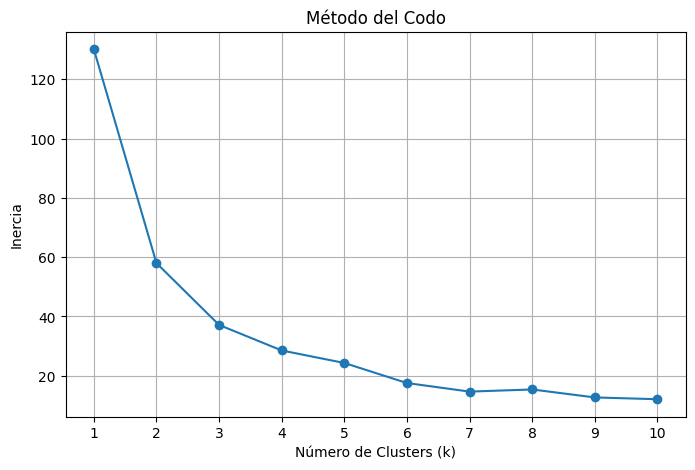

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de valores de k
k_values = range(1, 11)
inertia = []

# Calcular inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris[['sepal_length', 'sepal_width']])
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


El gráfico del método del codo muestra cómo la inercia disminuye a medida que se incrementa el número de clusters k. Inicialmente, se observa una reducción significativa de la inercia entre k=1 y k=2, lo que indica que dividir los datos en dos clusters mejora sustancialmente la segmentación. Sin embargo, después de k=2, la disminución en la inercia es menos pronunciada, lo que sugiere que agregar más clusters no aporta un beneficio significativo en términos de compactación de los puntos dentro de cada grupo. Este comportamiento es típico del método del codo y sugiere que el punto  k=2 es un valor razonable para el número óptimo de clusters en este caso, dado que representa un buen equilibrio entre simplicidad y efectividad al agrupar los datos del sépalo.

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos
3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.


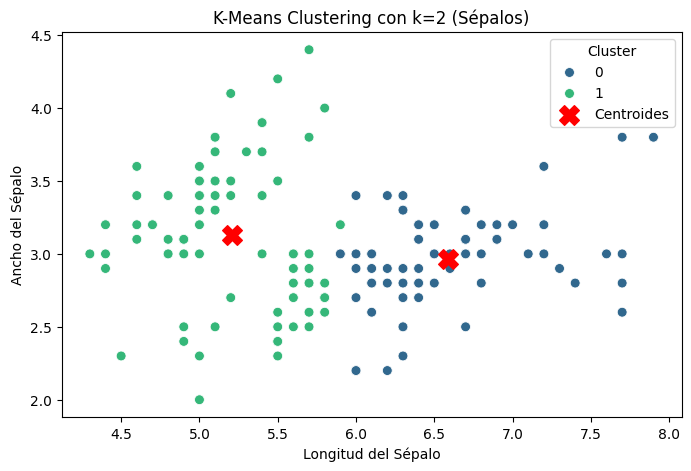

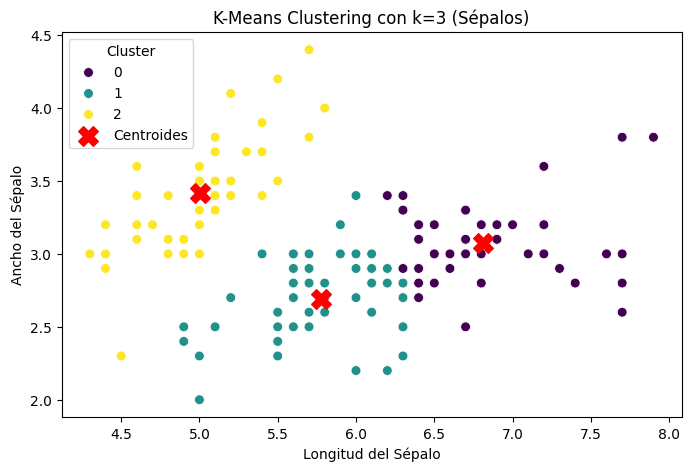

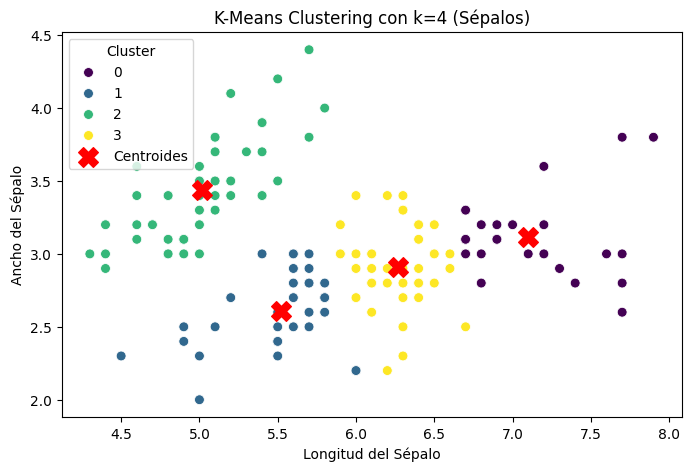

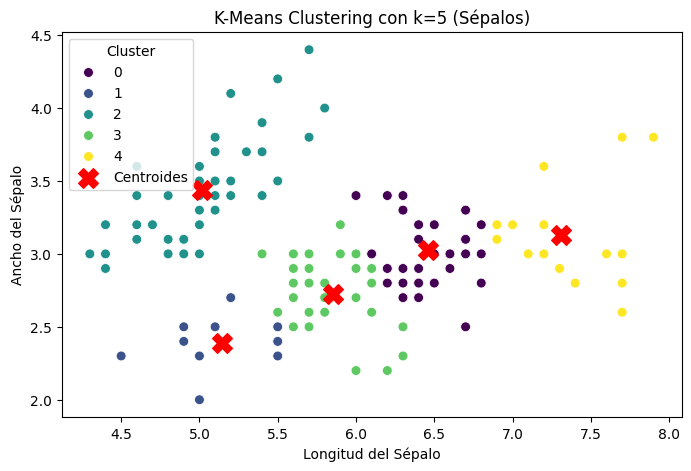

In [8]:
# Probar diferentes valores de k y graficar
k_values_to_test = [2, 3, 4, 5]  # Números de clusters seleccionados
for k in k_values_to_test:
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    iris[f'Cluster_k{k}'] = kmeans.fit_predict(iris[['sepal_length', 'sepal_width']])
    centroids = kmeans.cluster_centers_  # Extraer centroides
    
    # Graficar los clusters
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue=f'Cluster_k{k}', palette='viridis', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')  # Centroides
    plt.title(f'K-Means Clustering con k={k} (Sépalos)')
    plt.xlabel('Longitud del Sépalo')
    plt.ylabel('Ancho del Sépalo')
    plt.legend(title='Cluster')
    plt.show()


Gráfico 1: k=2
En este gráfico, los datos se dividen en dos grandes grupos principales. El Cluster 0 agrupa muestras con un ancho del sépalo mayor, mientras que el Cluster 1 incluye puntos con menor ancho. La separación es razonable, capturando las dos regiones más densas del espacio, aunque algunos puntos cercanos al límite muestran superposición entre los clusters, lo que sugiere cierta dificultad para segmentar completamente con solo dos grupos.

Gráfico 2: k=3
Al aumentar el número de clusters a 3, se genera un nuevo grupo (Cluster 2), que abarca puntos en la parte superior derecha del gráfico. Este nuevo cluster permite capturar detalles adicionales en la distribución de los datos, ajustando mejor las regiones. Sin embargo, se observa que todavía hay una ligera superposición entre los clusters, especialmente en los límites compartidos por Clusters 0 y 1.

Gráfico 3: k=4
Con cuatro clusters, los puntos comienzan a dividirse en subgrupos más específicos. El Cluster 2 del caso anterior se subdivide en dos grupos más pequeños, capturando patrones locales. Aunque esta segmentación es más detallada, algunos clusters (como 0 y 3) presentan límites menos definidos, indicando que los datos del sépalo no son completamente separables en cuatro grupos bien definidos.

Gráfico 4: k=5
En este caso, los datos se dividen en cinco clusters, lo que lleva a una segmentación más granular. Mientras que algunos clusters están claramente separados (como el Cluster 4), otros presentan una mayor superposición, lo que sugiere que aumentar excesivamente el número de clusters puede introducir complejidad innecesaria y reducir la generalización del modelo.



¿qué Uds creen mejor se ajusten a los datos?

La configuración con k=3 parece ajustarse mejor a los datos, ya que captura tres grupos bien diferenciados que reflejan la estructura natural de los puntos sin  gregar complejidad innecesaria. Aunque k=2 proporciona una segmentación sencilla, y k=4 o k=5 ofrecen más detalle, estos últimos introducen ruido o superposición entre clusters. Por lo tanto, k=3 logra un equilibrio entre simplicidad y representatividad en la distribución de los datos.









6. Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv

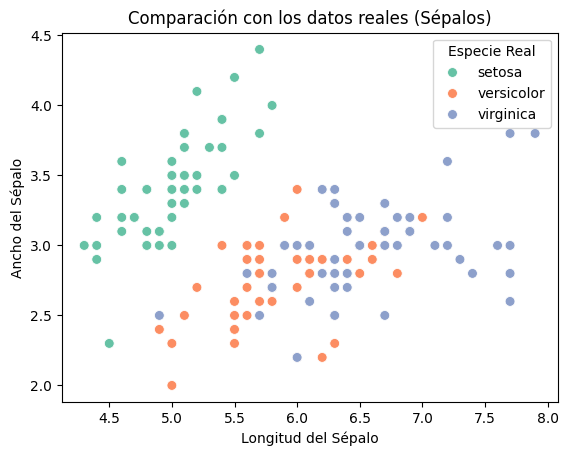

Real_Species  setosa  versicolor  virginica
Cluster_k3                                 
0                  0          12         35
1                  0          38         15
2                 50           0          0


In [10]:
# Importar los datos reales con respuestas
iris_real = pd.read_csv('iris-con-respuestas.csv')

# Agregar la columna de especies reales al DataFrame original
iris['Real_Species'] = iris_real['species']

# Visualizar los clusters generados junto con las especies reales
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='Real_Species', palette='Set2', s=50)
plt.title('Comparación con los datos reales (Sépalos)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.legend(title='Especie Real')
plt.show()

# Comparar los clusters generados (k=3, por ejemplo) con las especies reales
comparison_table = pd.crosstab(iris['Cluster_k3'], iris['Real_Species'])
print(comparison_table)


Gráfica comparativa:

 - La gráfica muestra cómo se distribuyen las especies reales (setosa, versicolor, virginica) en el espacio de las características del sépalo.
 - Setosa (verde): Este grupo es fácilmente distinguible y está bien separado de las otras dos especies, lo que indica que las características del sépalo son suficientes para identificar esta especie.
 - Versicolor (naranja) y Virginica (azul): Estos dos grupos tienen una superposición considerable, lo que sugiere que las características del sépalo no son suficientes para separarlos de manera clara.

Tabla de contingencia:

 - Cluster 0: Contiene 15 puntos de versicolor y 32 de virginica. Esto demuestra que este cluster combina puntos de ambas especies, lo que confirma la superposición observada en la gráfica.
 - Cluster 1: Contiene mayoritariamente puntos de versicolor (35) y algunos de virginica (18), mostrando nuevamente una mezcla significativa entre estas especies.
 - Cluster 2: Contiene únicamente puntos de setosa (49), lo que valida que esta especie es la más distinguible utilizando las características del sépalo.


Las características del sépalo (sepal_length y sepal_width) son suficientemente distintas para separar la especie setosa, pero no ofrecen una separación clara entre versicolor y virginica. Esto se debe a que estas dos especies tienen características del sépalo más similares y sus diferencias se manifiestan principalmente en las características del pétalo.
